In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Завантаження даних
df = pd.read_csv("Life Expectancy Data.csv")

# Попередня обробка
# Видалення пропусків
df.dropna(inplace=True)

# Видалення нечислових колонок
df = df.select_dtypes(include=['float64', 'int64'])

# Масштабування даних
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

print("Форма даних після підготовки:", scaled_data.shape)


Форма даних після підготовки: (1649, 20)


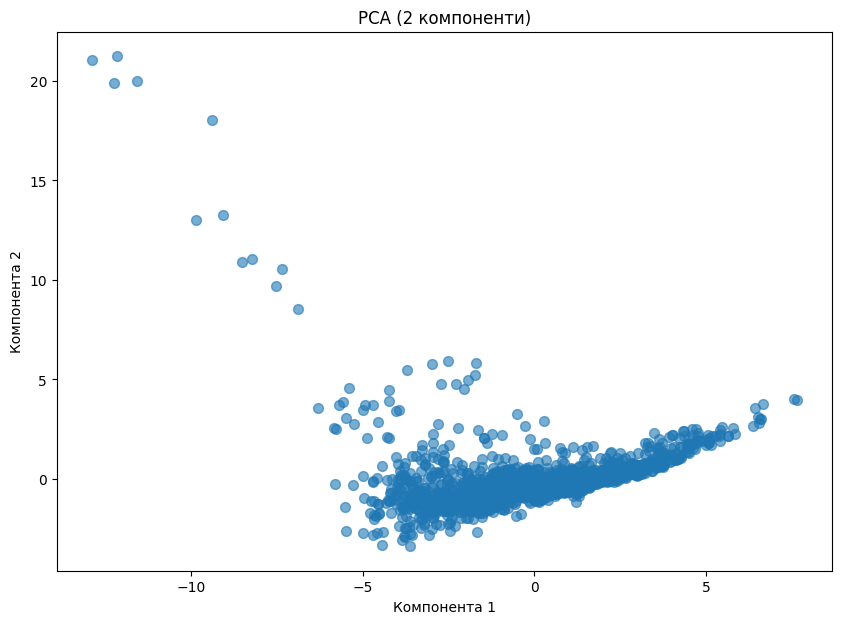

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA зі зменшенням до 2 компонент
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Візуалізація результату PCA
plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.6, s=50)
plt.title("PCA (2 компоненти)")
plt.xlabel("Компонента 1")
plt.ylabel("Компонента 2")
plt.show()


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


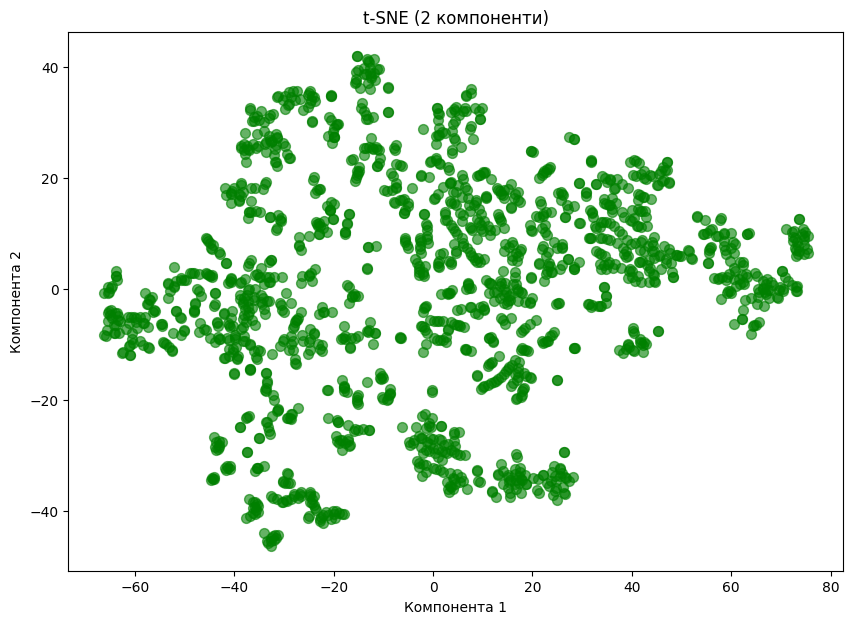

In [14]:
from sklearn.manifold import TSNE

# t-SNE зі зменшенням до 2 компонент
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_result = tsne.fit_transform(scaled_data)

# Візуалізація результату t-SNE
plt.figure(figsize=(10, 7))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.6, s=50, c='green')
plt.title("t-SNE (2 компоненти)")
plt.xlabel("Компонента 1")
plt.ylabel("Компонента 2")
plt.show()


In [15]:
## 2

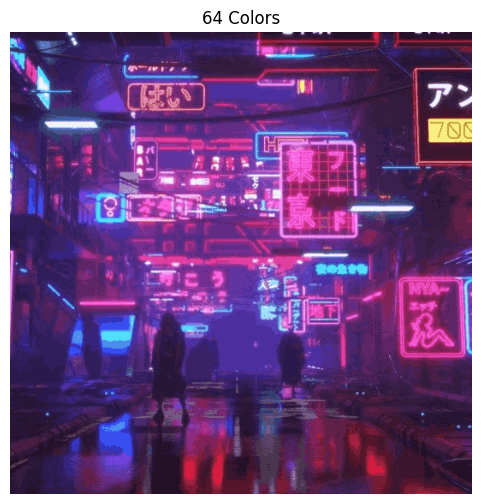

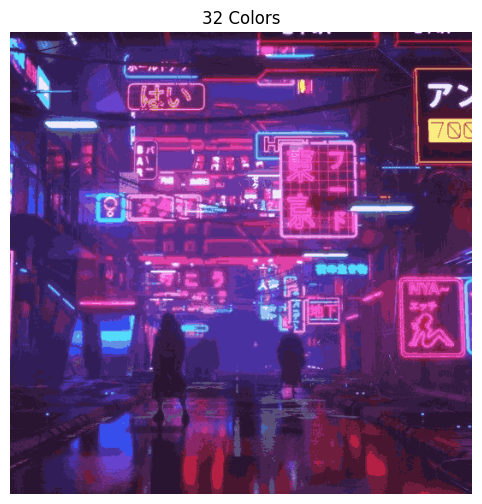

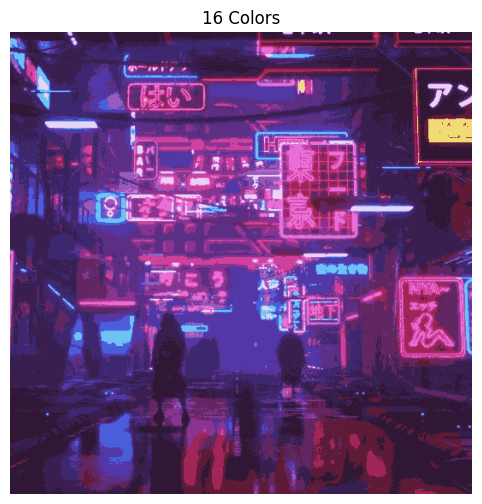

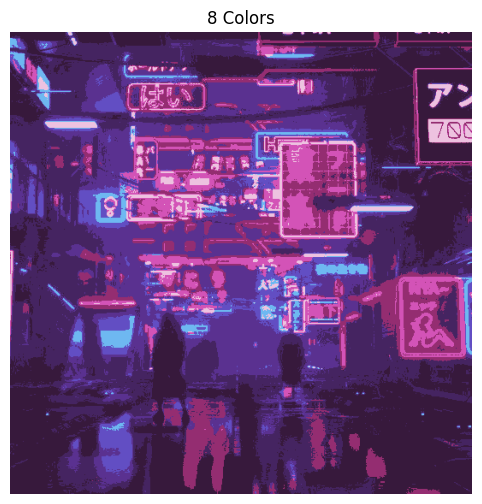

In [16]:
from sklearn.cluster import KMeans
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

# Завантаження зображення
image = imread('image.jpg')  # Замінити на шлях до вашого зображення
original_shape = image.shape  # Збереження розмірності зображення
image_reshaped = image.reshape(-1, 3)  # Перетворення на масив пікселів

# Функція для квантування зображення
def quantize_image(image, n_colors, original_shape):
    kmeans = KMeans(n_clusters=n_colors, random_state=42)
    kmeans.fit(image)
    compressed_image = kmeans.cluster_centers_[kmeans.labels_]
    return compressed_image.reshape(original_shape)  # Використання збереженої форми

# Квантування для різних рівнів
for n_colors in [64, 32, 16, 8]:
    compressed_image = quantize_image(image_reshaped, n_colors, original_shape)
    plt.figure(figsize=(8, 6))
    plt.imshow(compressed_image / 255)  # Нормалізуємо кольори
    plt.title(f'{n_colors} Colors')
    plt.axis('off')
    plt.show()


In [17]:
## 3

In [18]:
import os
import pandas as pd

# Вкажіть шлях до папки з датасетом
dataset_path = r"review_polarity\txt_sentoken"

# Завантаження позитивних і негативних відгуків
pos_reviews = []
neg_reviews = []

# Читання файлів із позитивними відгуками
for filename in os.listdir(os.path.join(dataset_path, "pos")):
    with open(os.path.join(dataset_path, "pos", filename), "r", encoding="utf-8") as file:
        pos_reviews.append(file.read())

# Читання файлів із негативними відгуками
for filename in os.listdir(os.path.join(dataset_path, "neg")):
    with open(os.path.join(dataset_path, "neg", filename), "r", encoding="utf-8") as file:
        neg_reviews.append(file.read())

# Формування датасету
reviews = pos_reviews + neg_reviews
labels = ["positive"] * len(pos_reviews) + ["negative"] * len(neg_reviews)

df = pd.DataFrame({"review": reviews, "sentiment": labels})
print(df.head())


                                              review sentiment
0  films adapted from comic books have had plenty...  positive
1  every now and then a movie comes along from a ...  positive
2  you've got mail works alot better than it dese...  positive
3   " jaws " is a rare film that grabs your atten...  positive
4  moviemaking is a lot like being the general ma...  positive


In [24]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [26]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')

nltk.download('punkt')
nltk.download('stopwords')

# Стоп-слова
stop_words = set(stopwords.words('english'))

# Функція для очищення тексту
def preprocess_text(text):
    text = text.lower()  # До нижнього регістру
    text = re.sub(r'\W', ' ', text)  # Видалення пунктуації
    text = re.sub(r'\s+', ' ', text)  # Видалення зайвих пробілів
    tokens = word_tokenize(text)  # Токенізація
    filtered_tokens = [word for word in tokens if word not in stop_words]  # Видалення стоп-слів
    return ' '.join(filtered_tokens)

# Передобробка текстів
df["cleaned_review"] = df["review"].apply(preprocess_text)
print(df.head())


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                              review sentiment  \
0  films adapted from comic books have had plenty...  positive   
1  every now and then a movie comes along from a ...  positive   
2  you've got mail works alot better than it dese...  positive   
3   " jaws " is a rare film that grabs your atten...  positive   
4  moviemaking is a lot like being the general ma...  positive   

                                      cleaned_review  
0  films adapted comic books plenty success wheth...  
1  every movie comes along suspect studio every i...  
2  got mail works alot better deserves order make...  
3  jaws rare film grabs attention shows single im...  
4  moviemaking lot like general manager nfl team ...  


In [30]:
!pip install WordCloud

Defaulting to user installation because normal site-packages is not writeable


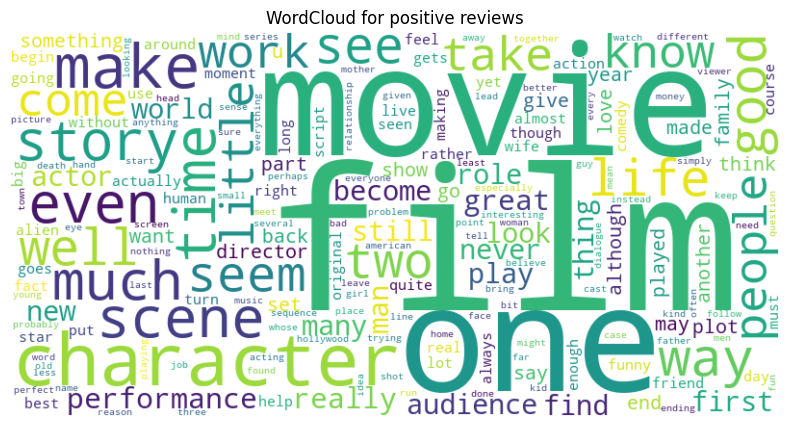

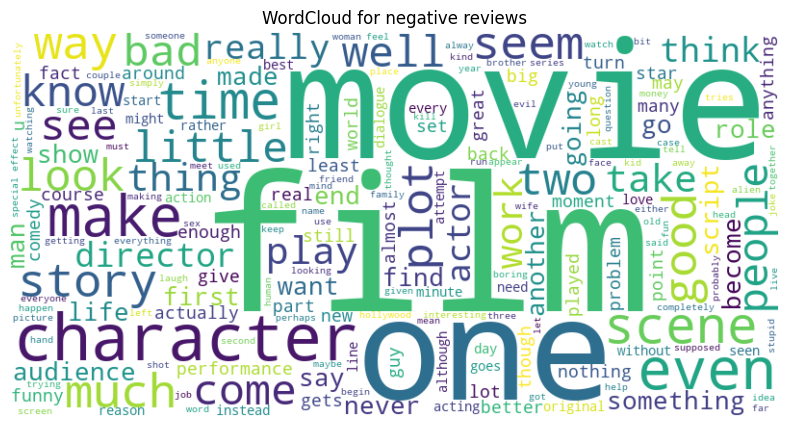

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Візуалізація для кожного класу
for sentiment in ['positive', 'negative']:
    text = ' '.join(df[df['sentiment'] == sentiment]["cleaned_review"])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"WordCloud for {sentiment} reviews")
    plt.axis('off')
    plt.show()


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Векторизація текстів
vectorizer = TfidfVectorizer(max_features=5000)  # Обмеження кількості ознак
X = vectorizer.fit_transform(df["cleaned_review"])
y = df["sentiment"]


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Розподіл на тренувальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Навчання моделі
model = MultinomialNB()
model.fit(X_train, y_train)

# Передбачення
y_pred = model.predict(X_test)

# Оцінка якості моделі
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

    negative       0.79      0.83      0.81       201
    positive       0.82      0.78      0.80       199

    accuracy                           0.81       400
   macro avg       0.81      0.80      0.80       400
weighted avg       0.81      0.81      0.80       400

Confusion Matrix:
 [[167  34]
 [ 44 155]]
